<a href="https://colab.research.google.com/github/hnansub/Hanan-Alsubaiei/blob/main/SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Import the data
from google.colab import drive
drive.mount('/content/drive')

from pathlib import Path
path=Path('/content/drive/MyDrive')
import pandas as pd
data=pd.read_excel(path/'sales.xlsx') 
data=data.dropna()#يحذف الصفوف الفاضية

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
data.shape

(36, 2)

In [13]:
data.head()

,Sales,Advertising
0,12.0,15.0
1,20.5,16.0
2,21.0,18.0
3,15.5,27.0
4,15.3,21.0


In [14]:
data.describe()

,Sales,Advertising
count,36.000000,36.000000
mean,24.255556,28.527778
std,6.185118,18.777625
min,12.000000,1.000000
25%,20.300000,15.750000
50%,24.250000,23.000000
75%,28.600000,41.000000
max,36.500000,65.000000


In [29]:
data.corr()

,Sales,Advertising
Sales,1.000000,0.630767
Advertising,0.630767,1.000000


In [15]:
X = data['Sales'].values
y = data['Advertising'].values

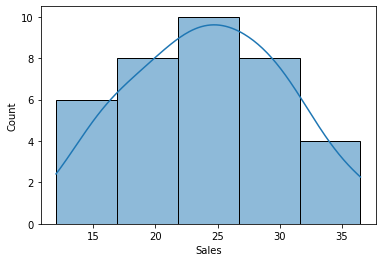

In [35]:
import seaborn as sns
sns.histplot(data['Sales'],bins=5,kde=True)
plt.show()

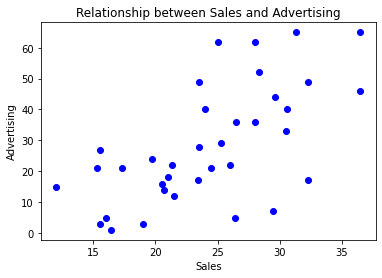

In [18]:
# Plot scatter plot between X and y
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.show()

In [17]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
# Print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)

(36, 1)
(36, 1)


In [19]:
# Split X and y into training and test data sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [21]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


# Train the model using training data sets
lr.fit(X_train,y_train)


# Predict on the test data
y_pred=lr.predict(X_test)


In [22]:
# Compute model slope and intercept

a = lr.coef_
b = lr.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b) 

Estimated model slope, a: [[1.60509347]]
Estimated model intercept, b: (array([-11.16003616]),)


In [24]:
# Predicting Advertising values

lr.predict(X)[0:5]

# Predicting Advertising values on first five Sales values.

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

In [25]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))


RMSE value: 11.2273


In [26]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))


R2 Score value: 0.5789


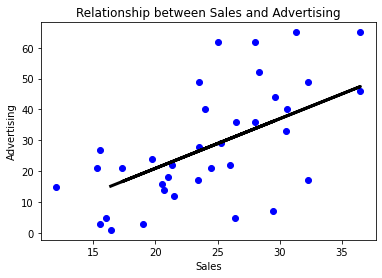

In [28]:
# Plot the Regression Line


plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.show()